# US Election 2020

In [617]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Preprocessing

In [618]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from colorama import Fore
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [619]:
df_norm = pd.read_csv('./DataFrame_norm.csv')

In [620]:
df_norm.set_index(['state', 'county'], inplace=True)
df_norm

Pres_DEM  Pres_REP  Gov_DEM  Gov_REP  TotalPop  \
state   county                                                              
Alabama Autauga County     0.274423  0.725577      NaN      NaN   55036.0   
        Baldwin County     0.227317  0.772683      NaN      NaN  203360.0   
        Barbour County     0.461391  0.538609      NaN      NaN   26201.0   
        Bibb County        0.208811  0.791189      NaN      NaN   22580.0   
        Blount County      0.096523  0.903477      NaN      NaN   57667.0   
...                             ...       ...      ...      ...       ...   
Vermont Orleans County          NaN       NaN      NaN      NaN   26951.0   
        Rutland County          NaN       NaN      NaN      NaN   59676.0   
        Washington County       NaN       NaN      NaN      NaN   58691.0   
        Windham County          NaN       NaN      NaN      NaN   43332.0   
        Windsor County          NaN       NaN      NaN      NaN   55485.0   

                                Men  Hispanic  White  Black  Native  Asian  \
state   county                                                               
Alabama Autauga County     0.488753       2.7   75.4   18.9     0.3    0.9   
        Baldwin County     0.489413       4.4   83.1    9.5     0.8    0.7   
        Barbour County     0.533415       4.2   45.7   47.8     0.2    0.6   
        Bibb County        0.542560       2.4   74.6   22.0     0.4    0.0   
        Blount County      0.494043       9.0   87.4    1.5     0.3    0.1   
...                             ...       ...    ...    ...     ...    ...   
Vermont Orleans County     0.502171       1.4   95.5    0.4     0.5    0.3   
        Rutland County     0.490566       1.4   95.5    0.7     0.3    1.1   
        Washington County  0.494062       1.9   94.4    0.8     0.3    0.6   
        Windham County     0.488600       2.2   93.5    0.8     0.1    1.0   
        Windsor County     0.489700       1.5   95.0    0.7     0.2    0.8   

                           Pacific  VotingAgeCitizen  IncomePerCap  Poverty  \
state   county                                                                
Alabama Autauga County         0.0          0.745258       27824.0     13.7   
        Baldwin County         0.0          0.764044       29364.0     11.8   
        Barbour County         0.0          0.773596       17561.0     27.2   
        Bibb County            0.0          0.782197       20911.0     15.2   
        Blount County          0.0          0.737215       22021.0     15.6   
...                            ...               ...           ...      ...   
Vermont Orleans County         0.0          0.785425       25392.0     14.2   
        Rutland County         0.0          0.808751       28443.0     11.4   
        Washington County      0.0          0.793393       32137.0     11.8   
        Windham County         0.1          0.802525       29819.0     14.1   
        Windsor County         0.1          0.798829       34264.0     10.2   

                           ChildPoverty  Professional  Service  Office  \
state   county                                                           
Alabama Autauga County             20.1          35.3     18.0    23.2   
        Baldwin County             16.1          35.7     18.2    25.6   
        Barbour County             44.9          25.0     16.8    22.6   
        Bibb County                26.6          24.4     17.6    19.7   
        Blount County              25.4          28.5     12.9    23.3   
...                                 ...           ...      ...     ...   
Vermont Orleans County             15.7          33.5     17.3    21.8   
        Rutland County             14.6          34.2     19.5    23.1   
        Washington County          18.1          44.7     15.6    22.2   
        Windham County             18.7          40.2     19.3    19.7   
        Windsor County             14.2          39.1     18.3    21.7   

                   

In [621]:
print(df_norm.isna().sum())
print(df_norm.shape)
df_norm.dropna(inplace=True)

X = df_norm.drop(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP'], axis=1)
y = df_norm['Pres_DEM']

Pres_DEM             100
Pres_REP             100
Gov_DEM             3706
Gov_REP             3706
TotalPop            1589
Men                 1589
Hispanic            1589
White               1589
Black               1589
Native              1589
Asian               1589
Pacific             1589
VotingAgeCitizen    1589
IncomePerCap        1589
Poverty             1589
ChildPoverty        1590
Professional        1589
Service             1589
Office              1589
Construction        1589
Production          1589
Drive               1589
Carpool             1589
Transit             1589
Walk                1589
OtherTransp         1589
WorkAtHome          1589
MeanCommute         1589
Employed            1589
PrivateWork         1589
PublicWork          1589
SelfEmployed        1589
FamilyWork          1589
Unemployment        1589
dtype: int64
(4731, 34)


In [622]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(data=X_scaled, index=X.index, columns=X.columns)

In [623]:
X.head(10)

TotalPop       Men  Hispanic     White     Black  \
state    county                                                                 
Delaware Kent County         0.651462 -0.946145  0.346057 -1.423723  1.751813   
         New Castle County   3.043033 -0.848175  0.828313 -1.695454  1.751813   
         Sussex County       0.917027 -0.818852  0.759420 -0.634409  0.622026   
Indiana  Adams County       -0.213551 -0.230718 -0.067305  0.581911 -0.432442   
         Allen County        1.870146 -0.656809  0.414951 -0.653818  0.546706   
         Bartholomew County  0.074559  0.114387  0.294387 -0.097417 -0.357123   
         Benton County      -0.378460  0.037596  0.053259  0.523683 -0.432442   
         Blackford County   -0.356360 -0.267717 -0.566784  0.730716 -0.498347   
         Boone County       -0.038234 -0.255696 -0.360103  0.446045 -0.366538   
         Brown County       -0.338869 -0.234580 -0.549561  0.724246 -0.470102   

                               Native     Asian   Pacific  VotingAgeCitizen  \
state    county                                                               
Delaware Kent County        -0.191121  0.783427 -0.393531         -0.388638   
         New Castle County  -0.239442  3.218819 -0.393531         -0.665857   
         Sussex County      -0.215282  0.210394 -0.393531          0.227859   
Indiana  Adams County       -0.263602 -0.362639 -0.393531         -1.625095   
         Allen County       -0.239442  1.857865 -0.393531         -1.068441   
         Bartholomew County -0.239442  3.863481  0.149201         -1.578840   
         Benton County      -0.263602 -0.505897 -0.393531         -0.411867   
         Blackford County   -0.239442 -0.291010 -0.393531          0.397730   
         Boone County       -0.239442  1.213202 -0.393531         -0.977345   
         Brown County       -0.263602 -0.147752 -0.393531          1.167759   

                             IncomePerCap   Poverty  ChildPoverty  \
state    county                                                     
Delaware Kent County             0.313498 -0.444312     -0.300398   
         New Castle County       1.606755 -0.638605     -0.567309   
         Sussex County           1.122397 -0.620942     -0.044163   
Indiana  Adams County           -0.755470  0.597804      0.916716   
         Allen County            0.224871 -0.144041      0.083954   
         Bartholomew County      0.773884 -0.550290     -0.321751   
         Benton County          -0.370816 -0.108715      0.051925   
         Blackford County       -0.611270 -0.479638     -0.439192   
         Boone County            3.114678 -1.663058     -1.421424   
         Brown County            1.029956 -0.868224     -1.186542   

                             Professional   Service    Office  Construction  \
state    county                                                               
Delaware Kent County             0.327031  0.447702  0.504056     -0.807226   
         New Castle County       1.978537 -0.315791  0.658756     -1.535077   
         Sussex County           0.295272  0.147758  0.844395     -0.469295   
Indiana  Adams County           -1.149795 -0.615735 -0.516958      0.232561   
         Allen County            0.358791 -0.452129  0.937214     -1.405104   
         Bartholomew County      1.470381 -1.024749 -0.733536     -1.717040   
         Benton County          -0.990997 -1.433764  0.999094      0.284551   
         Blackford County       -1.387993 -1.024749 -0.021920     -0.599268   
         Boone County            2.661370 -1.570102 -0.145680     -1.535077   
         Brown County            0.295272 -0.806608  0.999094     -0.391311   

                             Production     Drive   Carpool   Transit  \
state    county                                                         
Delaware Kent County          -0.379883  0.447917 -0.170797  0.559713   
         New Castle County    -1.212547  0.221028 -0.857051  3.061686   
         Sussex County        -0.5431

In [624]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13725)

## PCA

In [625]:
from sklearn.decomposition import PCA

In [626]:
len(X.columns)

30

In [627]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X[['TotalPop', 'Men', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']])
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.179704,1.225353,1.968656,-0.731958,-0.817204,0.361641,-0.301097,0.743922,-1.096357,0.175362
1,-0.113061,4.856909,4.702661,-1.134544,-0.044408,1.566426,0.135912,1.384033,-0.179110,-0.062863
2,-0.510463,1.755538,0.838362,-0.895406,-0.777803,0.311715,-0.504677,0.128195,-0.485864,0.692337
3,-1.235462,-0.224979,-1.630496,2.825923,0.677073,1.018937,0.354804,-0.990076,0.311971,-0.916441
4,-1.359237,3.432912,1.390087,-0.058956,-0.884728,0.760151,0.495743,-0.167218,0.517050,0.138386
5,-0.025718,4.079973,1.159408,0.588424,-0.642412,0.072271,1.020147,0.088747,0.641991,-1.398327
6,0.073995,0.215937,-1.482286,1.008870,-0.059793,0.221360,-0.939720,-0.155506,0.675579,0.112435
7,-1.566943,1.269132,-2.530745,0.125208,-0.161044,0.342560,0.674333,-0.032431,1.157306,-0.877983
8,2.238214,4.647103,-0.078400,-1.089377,-1.826485,-0.476243,-0.891978,0.331005,-0.159057,-0.861542
9,0.266266,1.965585,-2.024013,-1.606568,-0.153903,0.003843,-1.563020,0.849233,0.436845,0.499534


In [628]:
pd.DataFrame(pca.components_).T.head(15)

,0,1,2,3,4,5,6,7,8,9
0,-0.018092,0.262460,0.305378,-0.009439,0.165523,0.120148,0.016789,0.106366,0.183054,0.049895
1,0.120406,-0.106302,-0.045037,0.137475,0.130243,-0.293611,0.140346,0.451353,-0.164048,0.164487
2,-0.053726,0.080172,0.208033,0.490833,-0.113122,-0.018703,-0.030909,-0.008928,-0.130259,0.259567
3,0.146114,0.057871,-0.380583,-0.132521,0.300370,-0.119173,0.022804,-0.115880,0.173578,-0.023234
4,-0.176358,0.006226,0.193621,-0.073819,-0.198003,0.407835,-0.027834,0.205533,-0.395097,0.167319
5,-0.011150,-0.220064,0.222367,0.008337,-0.284646,-0.284626,-0.000332,-0.061245,0.254007,-0.343541
6,0.021876,0.245890,0.332192,-0.041892,0.198574,0.064345,0.090554,0.130931,0.084424,-0.114407
7,0.008679,0.078729,0.185596,0.122242,0.335758,-0.245161,-0.043318,-0.092726,0.303055,0.217167
8,0.059383,-0.103829,-0.207058,-0.485078,0.228249,0.156134,0.037841,0.100296,-0.131372,0.007948
9,0.262142,0.243805,0.055108,-0.085902,-0.093455,-0.003979,-0.054376,0.144934,-0.158648,-0.056150


In [629]:
loadings = pca.components_
pc_list = [f"PC{i}" for i in range(1,pca.components_.shape[0]+1)]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X[['TotalPop', 'Men', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']].columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df.T

variable,TotalPop,Men,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
PC1,-0.018092,0.120406,-0.053726,0.146114,-0.176358,-0.011150,0.021876,0.008679,0.059383,0.262142,-0.239656,-0.266643,0.255204,-0.124343,-0.122288,0.116220,-0.196396,-0.280935,-0.082284,0.039939,0.260260,0.038293,0.302659,-0.184970,0.228665,-0.198293,0.012667,0.285279,0.212657,-0.282973
PC2,0.262460,-0.106302,0.080172,0.057871,0.006226,-0.220064,0.245890,0.078729,-0.103829,0.243805,-0.268526,-0.239276,0.106423,-0.184596,0.164458,-0.235490,0.061972,0.180736,-0.087932,0.163830,-0.181468,-0.011097,-0.134887,0.046259,0.282961,0.322897,-0.289123,-0.158211,-0.156804,-0.159438
PC3,0.305378,-0.045037,0.208033,-0.380583,0.193621,0.222367,0.332192,0.185596,-0.207058,0.055108,0.144990,0.093080,0.250721,0.079292,0.072367,-0.140561,-0.255265,-0.128269,-0.019449,0.308682,0.067607,0.078329,0.073700,-0.101911,-0.024742,-0.156204,0.250233,-0.049534,-0.004825,0.145664
PC4,-0.009439,0.137475,0.490833,-0.132521,-0.073819,0.008337,-0.041892,0.122242,-0.485078,-0.085902,-0.060651,-0.046031,-0.202310,-0.178926,-0.216360,0.284168,0.250652,-0.158107,0.333278,-0.035993,-0.001266,0.109690,0.033182,-0.067799,0.020662,0.090859,-0.123123,-0.004490,0.039679,-0.089276
PC5,0.165523,0.130243,-0.113122,0.300370,-0.198003,-0.284646,0.198574,0.335758,0.228249,-0.093455,0.019639,-0.000636,-0.111736,0.116881,0.046345,0.052582,-0.012428,-0.255664,0.303822,0.302827,0.057447,0.305293,0.023889,0.296739,-0.210359,0.022122,0.001407,-0.036333,-0.018562,0.082975
PC6,0.120148,-0.293611,-0.018703,-0.119173,0.407835,-0.284626,0.064345,-0.245161,0.156134,-0.003979,0.169281,0.226265,0.002883,-0.198312,-0.173195,0.057198,0.171126,-0.154017,-0.059168,0.124044,0.115778,0.105187,0.150338,0.062352,0.021300,0.098940,-0.338178,0.214659,0.301331,0.109692
PC7,0.016789,0.140346,-0.030909,0.022804,-0.027834,-0.000332,0.090554,-0.043318,0.037841,-0.054376,0.072497,0.030653,-0.190727,0.487815,-0.230381,-0.203412,0.153233,-0.082469,-0.124925,0.104941,0.389848,0.037026,-0.204842,-0.408732,0.155308,0.205954,-0.093538,-0.242182,0.130107,-0.134818
PC8,0.106366,0.451353,-0.008928,-0.115880,0.205533,-0.061245,0.130931,-0.092726,0.100296,0.144934,-0.123379,-0.085106,-0.006679,0.046864,-0.398151,0.133577,0.104612,0.054331,-0.040636,0.130903,0.033454,-0.513628,-0.006132,0.378230,-0.036877,-0.035641,0.117156,-0.079234,-0.045540,0.046547
PC9,0.183054,-0.164048,-0.130259,0.173578,-0.395097,0.254007,0.084424,0.303055,-0.131372,-0.158648,0.161268,0.150755,-0.030120,-0.264506,-0.062970,0.093284,0.163802,0.099299,-0.327192,0.166128,0.071906,-0.364598,0.030524,0.008008,-0.096950,0.045584,-0.086630,-0.000592,0.261570,0.018657
PC10,0.049895,0.164487,0.259567,-0.023234,0.167319,-0.343541,-0.114407,0.217167,0.007948,-0.056150,-0.029547,0.042448,-0.099082,0.099739,0.463312,0.245231,-0.356261,0.044811,-0.167186,-0.167455,0.178244,-0.253690,-0.027814,-0.034360,-0.083249,0.088938,-0.095139,-0.066605,0.290088,-0.018345


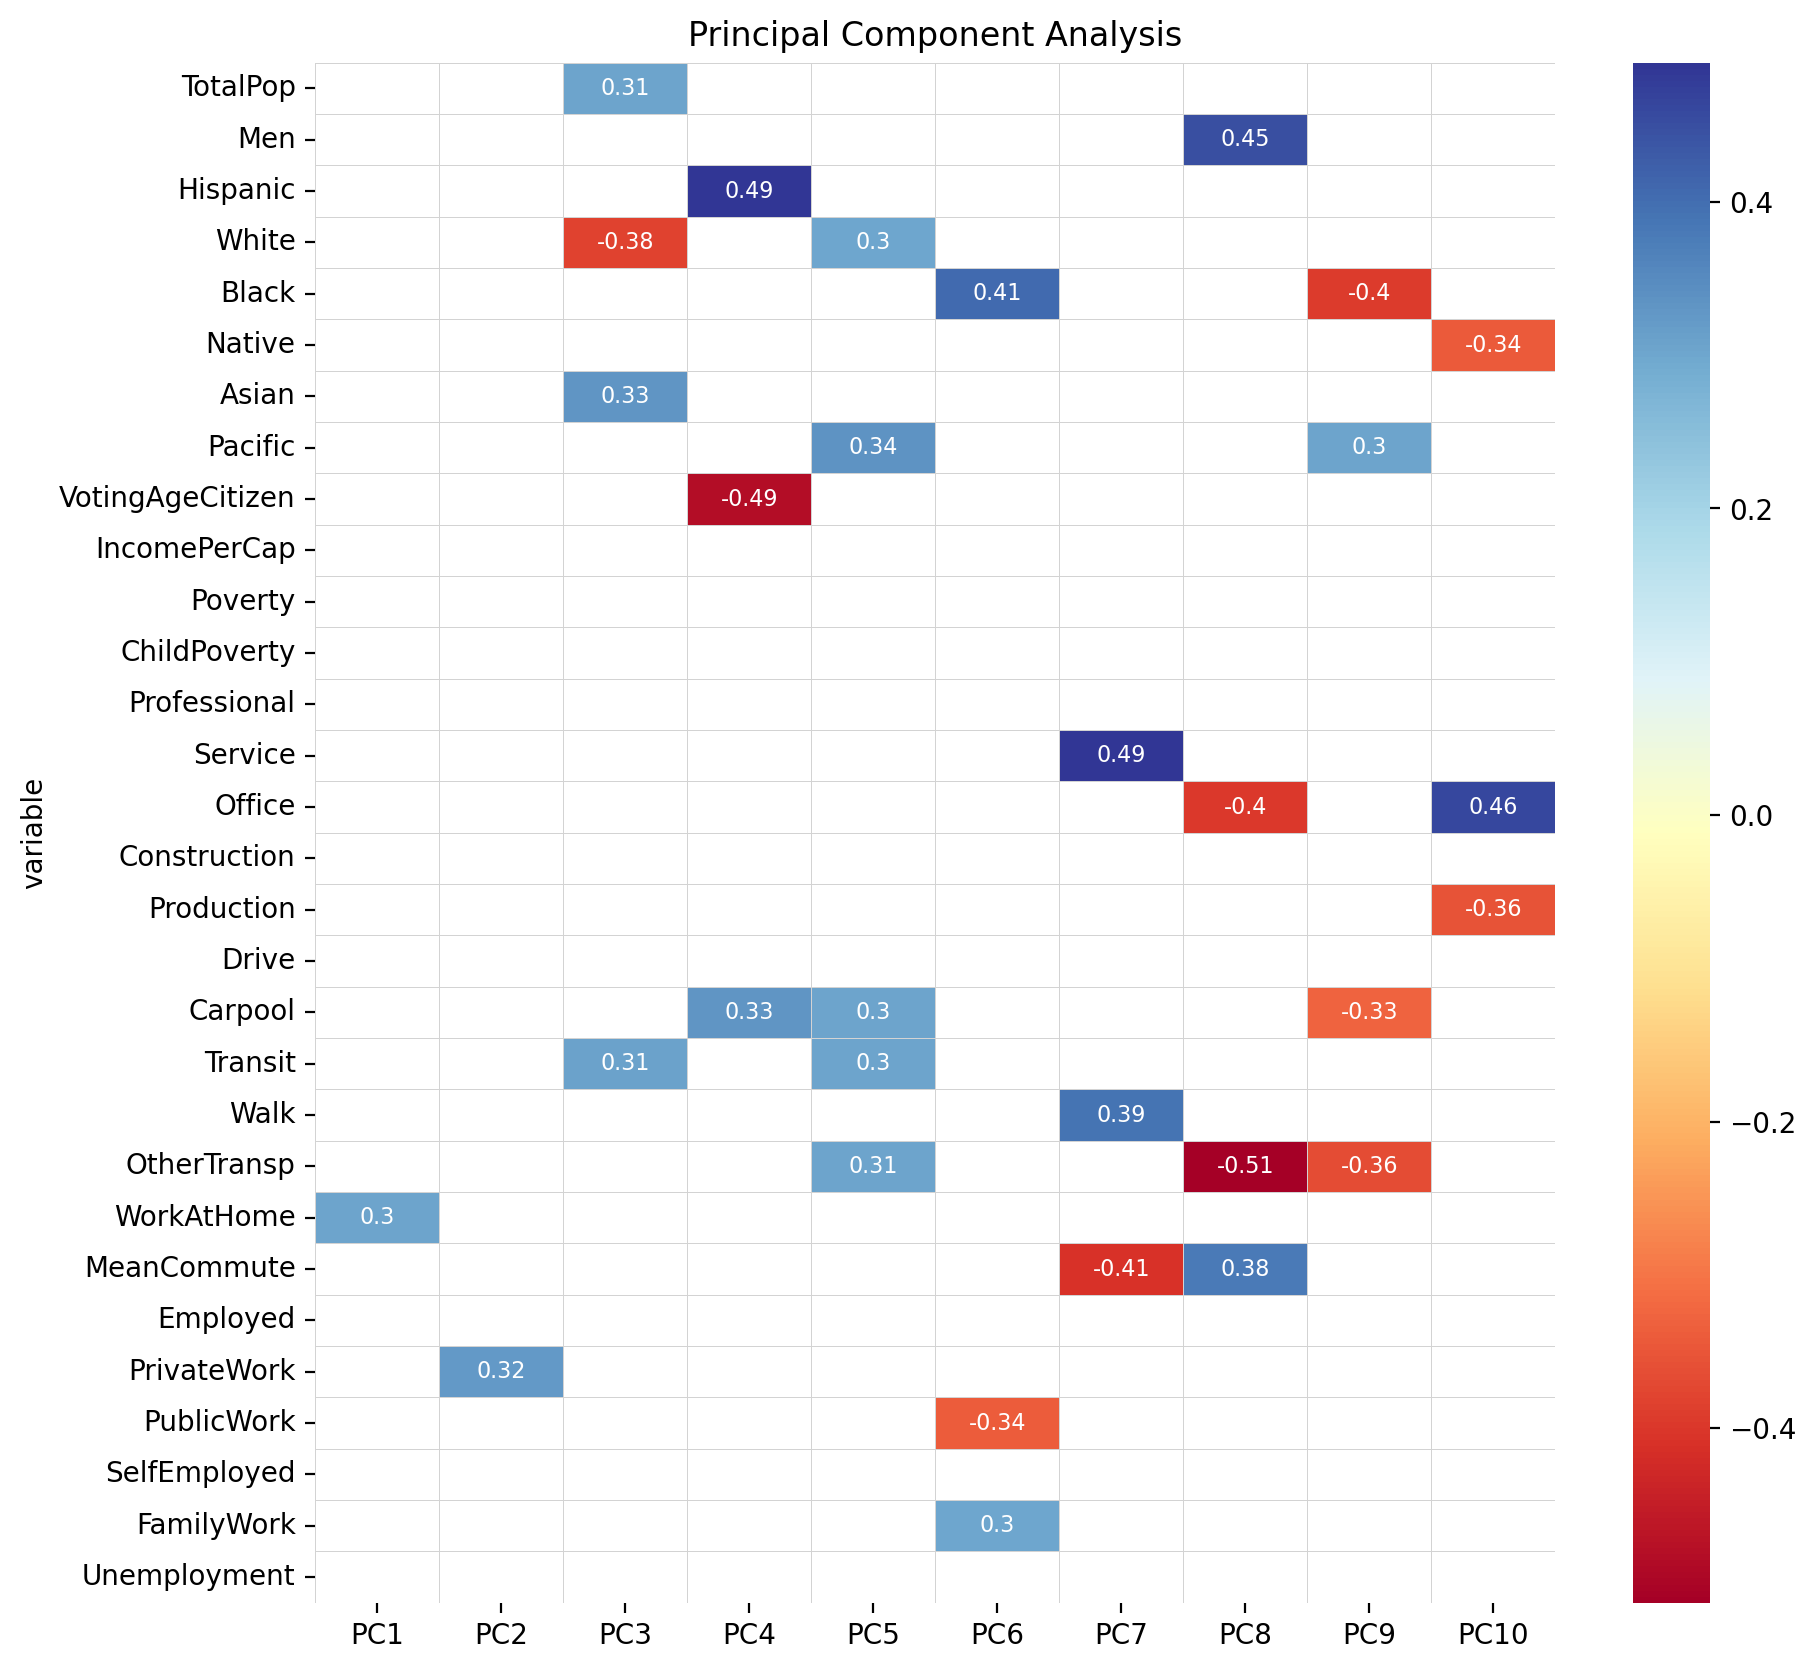

In [630]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
threshold = 0.3
mask = loadings_df.where((abs(loadings_df)>threshold)).isna()
ax = sns.heatmap(loadings_df,
                 cmap='RdYlBu',
                 annot=True,
                 annot_kws={'size':8},
                 linewidths=0.2,
                 linecolor='lightgrey',
                 mask=mask,
                )
ax.set(
    xlabel="", title="Principal Component Analysis",
)
plt.show()

In [631]:
print("Variance Ratio:")
for idx, i in enumerate(pca.explained_variance_ratio_):
    print(f"PCA{idx+1} = {i:2.0%}")

Variance Ratio:
PCA1 = 21%
PCA2 = 15%
PCA3 = 13%
PCA4 = 7%
PCA5 = 5%
PCA6 = 5%
PCA7 = 4%
PCA8 = 4%
PCA9 = 3%
PCA10 = 3%


In [632]:
print(Fore.GREEN + f"Sum of {pca.n_components_} PCA Variation Ratio : {sum(pca.explained_variance_ratio_)*100:.2f}%")

Sum of 10 PCA Variation Ratio : 80.06%


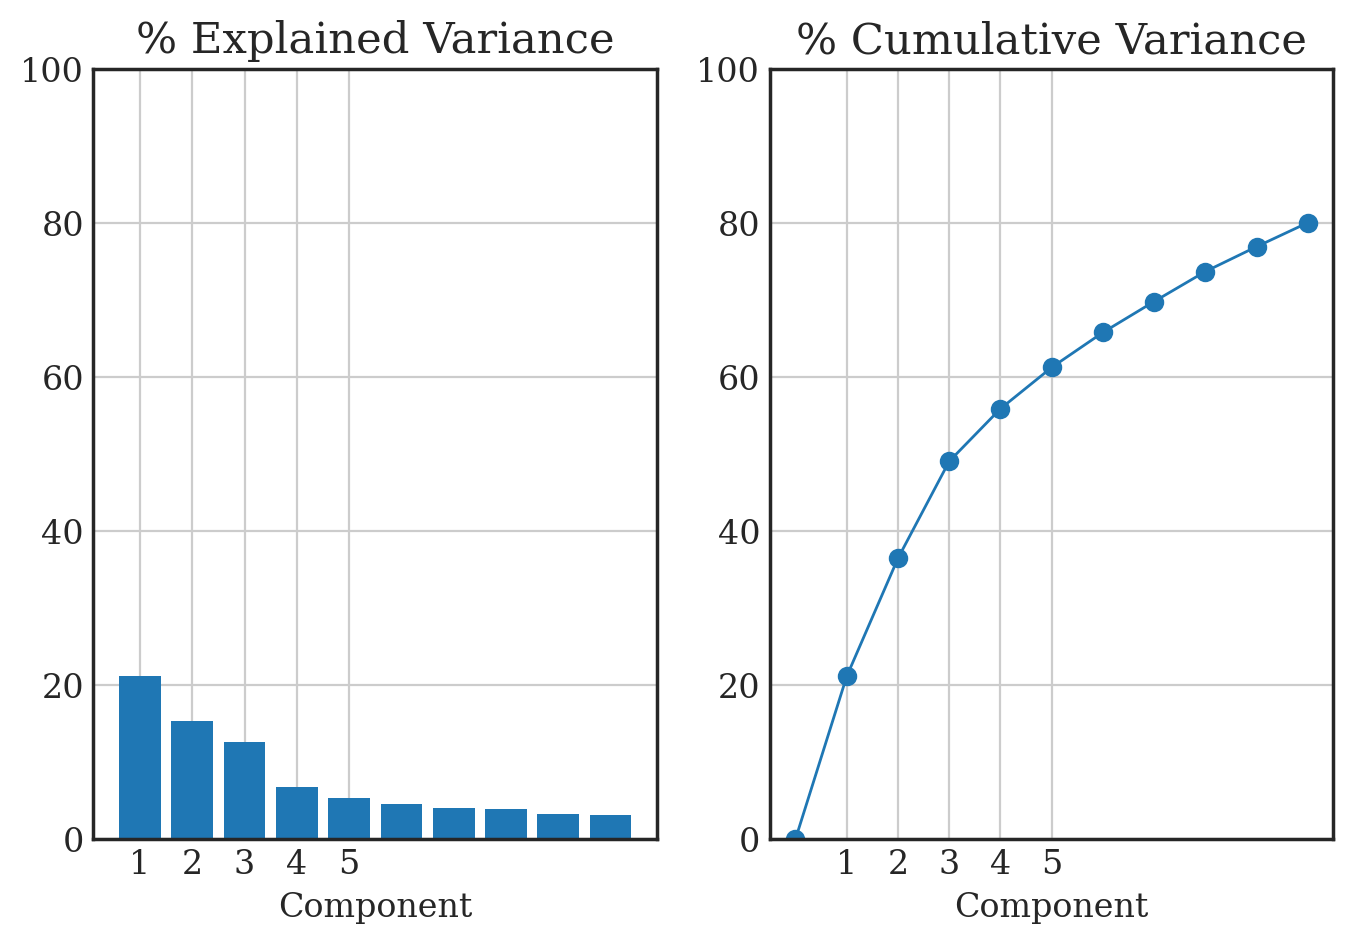

In [633]:
import numpy as np
import matplotlib.pyplot as plt

def plot_variance(pca):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n+1)
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, 100*evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0,100), xticks=range(1,6)
    )
    axs[0].grid()
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], 100*np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0, 100), xticks=range(1,6)
    )
    axs[1].grid()
    fig.set(figwidth=8, dpi=100)
    return axs

if __name__=="__main__":
    plt.style.use('seaborn-white')
    plt.rcParams['figure.figsize']=5,5 
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 13
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['axes.labelsize']=12
    plt.rcParams['xtick.labelsize']=12
    plt.rcParams['ytick.labelsize']=12
    plt.rcParams['legend.fontsize']=12
    plot_variance(pca)

In [634]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features): 
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

if __name__=="__main__":
    mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
    print(mi_scores)

PC3     0.438247
PC9     0.170965
PC2     0.151493
PC6     0.112577
PC1     0.072647
PC7     0.055972
PC5     0.040775
PC8     0.024379
PC10    0.009060
PC4     0.000000
Name: MI Scores, dtype: float64


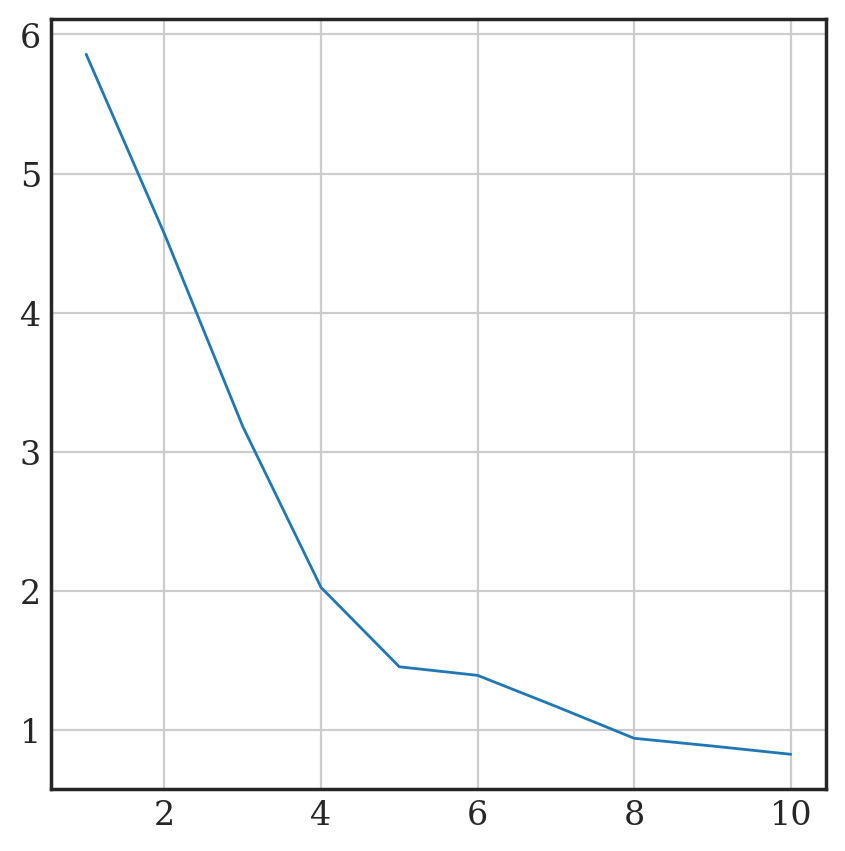

In [635]:
# PCA를 이용해 Dimensionality Reduction 수행
pca = PCA(n_components=10)
pca.fit(x_train)
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_)
plt.grid()

In [636]:
pca = PCA(n_components=5)
pca.fit(x_train)

PCA(n_components=5)

In [637]:
from lightgbm import LGBMRegressor

In [638]:
model_reg = LGBMRegressor()
model_reg.fit(pca.transform(x_train), y_train)

LGBMRegressor()

In [639]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt

In [640]:
pred = model_reg.predict(pca.transform(x_test))
print(mean_squared_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
print(classification_report(y_test>0.5, pred>0.5))

0.008949416344393994
0.09460135487610098
              precision    recall  f1-score   support

       False       0.94      0.96      0.95       140
        True       0.74      0.61      0.67        23

    accuracy                           0.91       163
   macro avg       0.84      0.79      0.81       163
weighted avg       0.91      0.91      0.91       163



## unuse PCA

In [641]:
model_reg.fit(x_train, y_train)
pred = model_reg.predict(x_test)
print(mean_squared_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
print(classification_report(y_test>0.5, pred>0.5))

0.005723826340689929
0.07565597359554584
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       140
        True       0.94      0.74      0.83        23

    accuracy                           0.96       163
   macro avg       0.95      0.87      0.90       163
weighted avg       0.96      0.96      0.95       163



In [642]:
from xgboost import XGBClassifier

In [643]:
model_cls = XGBClassifier()
model_cls.fit(x_train, y_train>0.5)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [644]:
plt.style.use('default')

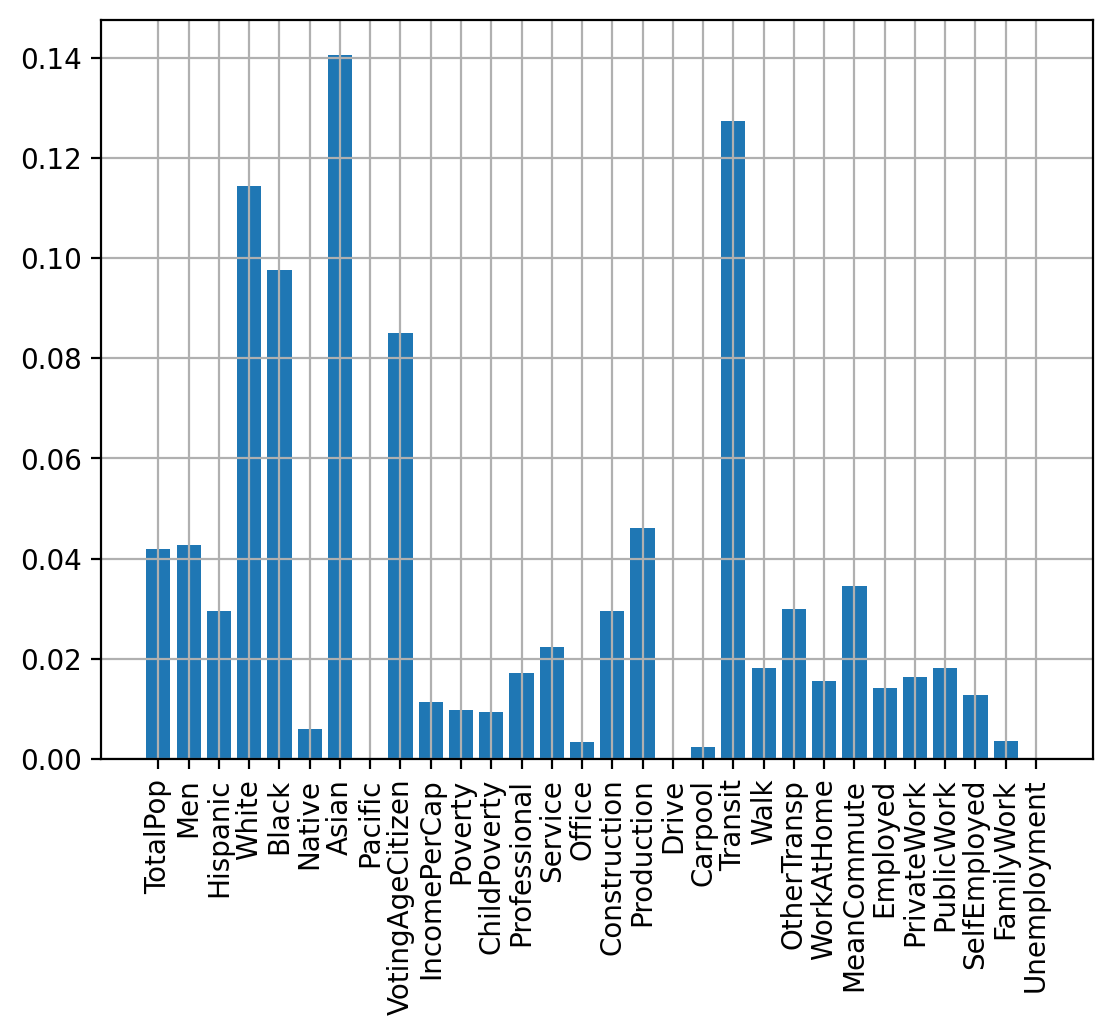

In [645]:
plt.bar(X.columns, model_cls.feature_importances_)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [646]:
pred = model_cls.predict(x_test)
print(classification_report(y_test>0.5, pred))

              precision    recall  f1-score   support

       False       0.94      0.99      0.96       140
        True       0.88      0.61      0.72        23

    accuracy                           0.93       163
   macro avg       0.91      0.80      0.84       163
weighted avg       0.93      0.93      0.93       163



## Modeling

In [647]:
accuracy_dict = {}
y_train = pd.Series(data = np.where(y_train>0.5, 1, 0), index = y_train.index)
y_test = pd.Series(data = np.where(y_test>0.5, 1, 0), index = y_test.index)

In [648]:
x_train

,,TotalPop,Men,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
state,county,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Indiana,Tipton County,-0.337097,-0.048626,-0.377326,0.685427,-0.498347,-0.263602,-0.649156,1.777400,0.538191,0.510910,-1.080180,-0.257692,0.136473,-0.643003,-1.476092,0.206567,0.893603,0.844972,-0.459746,-0.244493,-0.583274,0.447416,-0.734734,0.106759,0.818333,0.811446,-0.384359,-0.836585,-0.243581,-0.800039
North Carolina,Caswell County,-0.289859,0.170847,-0.170645,-1.527239,2.589738,-0.251522,-0.219381,0.691934,0.836564,-0.726775,1.021716,1.386479,-0.578121,0.556773,0.411237,-0.547279,0.387474,0.291931,1.310067,-0.333849,-0.608895,-0.337372,-0.680209,1.514293,-0.387232,-0.100831,0.559475,-0.470046,-0.243581,0.890779
Missouri,Dallas County,-0.329889,-0.342300,-0.497890,0.659548,-0.517176,-0.179041,-0.505897,-0.393531,0.076403,-1.098171,0.032589,0.148012,-0.784559,0.256829,0.009019,-0.391311,0.893603,-0.346194,1.454541,-0.244493,-0.403929,1.918894,-0.434845,1.919201,-1.308363,0.490916,-1.261958,0.690661,0.240604,0.670237
Utah,Beaver County,-0.392682,0.745620,1.052218,0.258421,-0.517176,-0.251522,-0.505897,-0.393531,-2.367410,-0.829204,-0.885887,-0.577985,-1.197435,0.147758,1.184733,0.752455,0.044612,0.178487,0.876643,-0.333849,-0.250204,-0.435471,-0.543896,-1.377901,-0.438752,0.232027,0.046162,-0.470046,0.240604,-0.469227
Missouri,St. Clair County,-0.374007,0.261278,-0.652901,0.633669,-0.432442,-0.179041,-0.505897,-0.393531,1.157037,-0.883869,1.180683,1.418509,-0.371682,0.611308,-0.826356,0.960412,-0.151309,-0.743249,-0.423628,-0.512562,0.159728,0.839810,1.500806,1.244355,-1.327634,-0.224111,-0.351242,0.751751,0.401999,0.743751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
North Carolina,Transylvania County,-0.224366,-1.019378,-0.273986,0.303710,-0.140581,-0.215282,-0.219381,-0.393531,1.269388,0.062328,-0.002737,0.863334,-0.244644,1.020322,0.999094,-0.183354,-0.771725,0.121764,-0.098560,-0.244493,-0.378308,-0.631668,0.464824,0.569510,-0.662268,-0.248768,-0.516826,1.138653,-0.566372,0.302668
Indiana,White County,-0.280803,0.098306,0.535515,0.329589,-0.479517,-0.239442,-0.505897,-0.393531,-0.486368,0.105552,-1.009528,-0.823543,-0.752799,-0.970214,-0.362258,0.102588,1.465039,0.433736,0.226508,-0.423205,-0.480791,0.447416,-0.489370,0.338134,0.553334,0.885414,-0.682411,-0.571862,-0.404976,-0.579498
North Dakota,Cavalier County,-0.408946,0.498848,-0.652901,0.711306,-0.488932,-0.130720,-0.649156,-0.393531,0.697345,3.169162,-1.221483,-0.908955,1.263943,-2.006384,-0.176620,0.388529,-0.265596,0.589722,-2.121203,-0.512562,0.262211,-0.925963,0.601137,-2.052747,1.147036,-1.087076,-0.616177,2.584446,-0.082186,-1.718962


In [649]:
y_train.sum()

38

### Logistic Regression

In [650]:
y_test.sum()

23

In [651]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_dict['Logistic Regression'] = 100*log_reg_acc
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       140
           1       0.85      0.74      0.79        23

    accuracy                           0.94       163
   macro avg       0.90      0.86      0.88       163
weighted avg       0.94      0.94      0.94       163



In [652]:
print(Fore.GREEN + f"Accuracy of Logistic Regression is: {100*log_reg_acc:.2f}%")

Accuracy of Logistic Regression is: 94.48%


<Figure size 640x480 with 0 Axes>

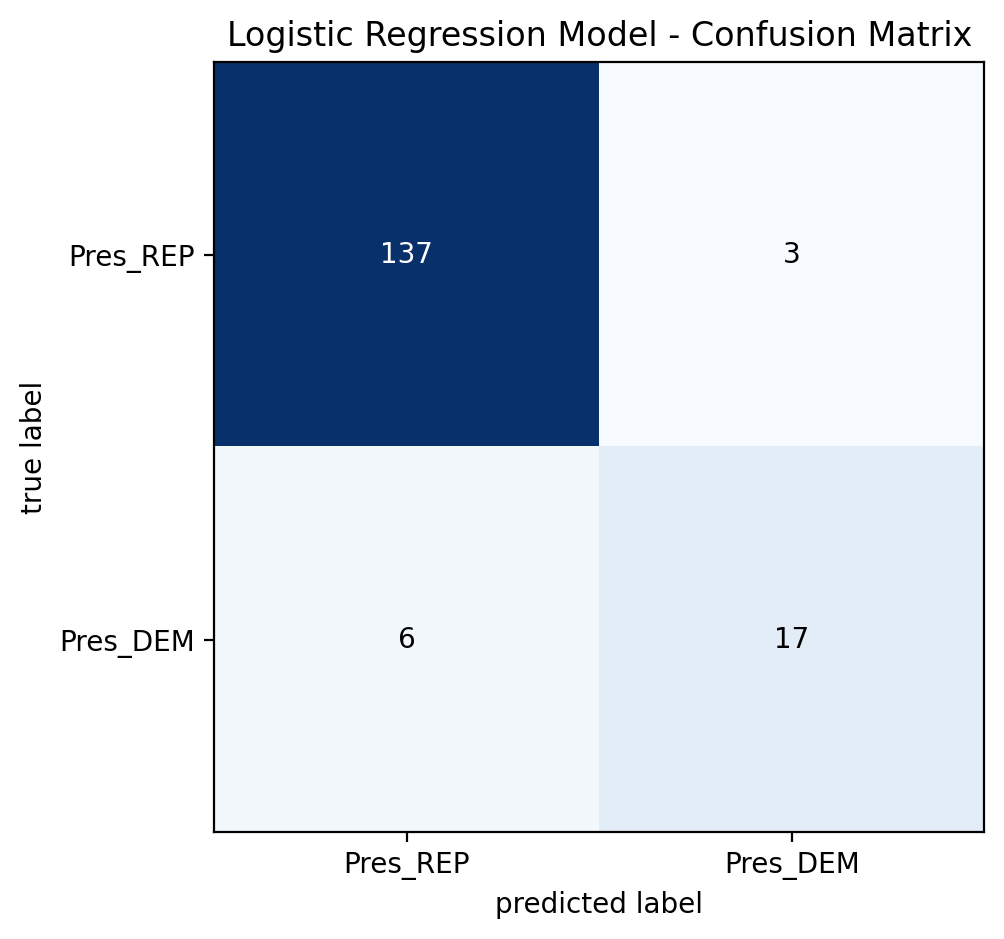

In [653]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### Support Vector Classifier

In [654]:
from sklearn.svm import SVC

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_dict['Support Vector Classifier'] = 100*sv_clf_acc
print(classification_report(y_test, sv_clf_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       140
           1       0.93      0.57      0.70        23

    accuracy                           0.93       163
   macro avg       0.93      0.78      0.83       163
weighted avg       0.93      0.93      0.93       163



In [655]:
print(Fore.GREEN + f"Accuracy of SVC is: {100*sv_clf_acc:.2f}%")

Accuracy of SVC is: 93.25%


<Figure size 640x480 with 0 Axes>

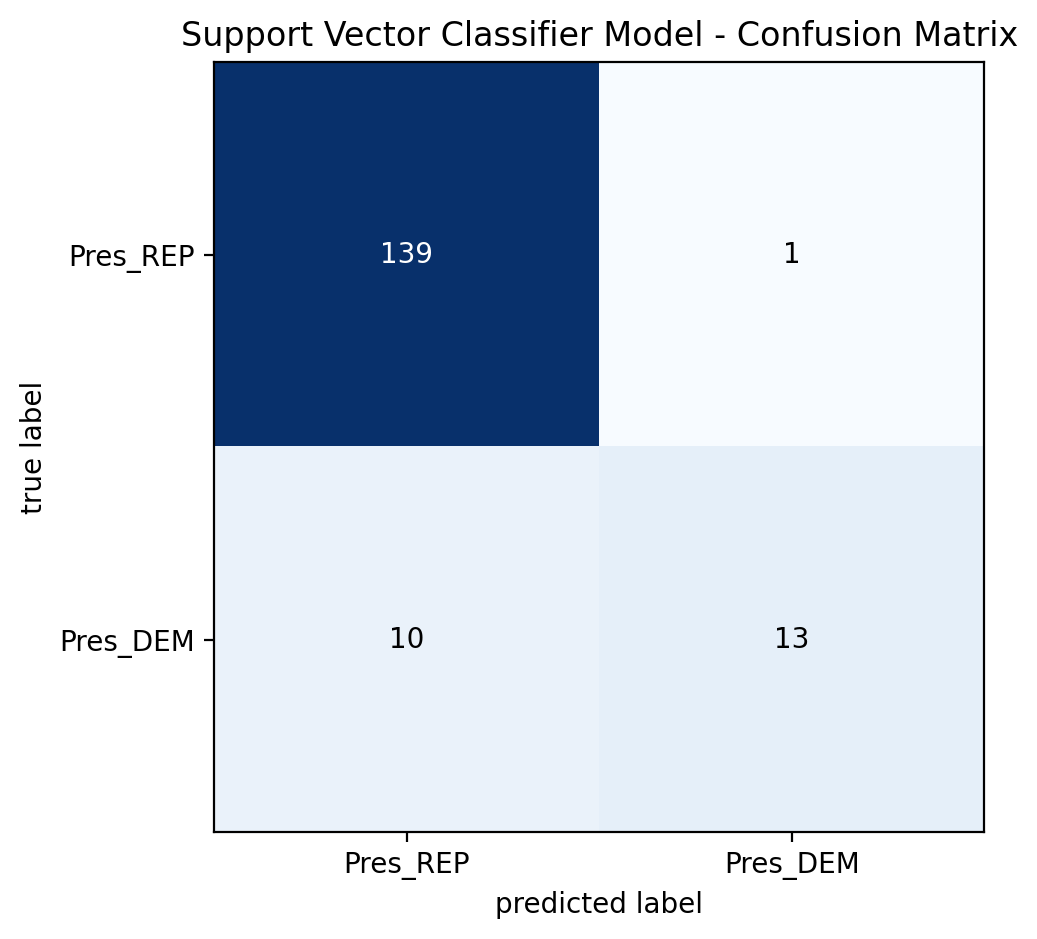

In [656]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Support Vector Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### K Neighbors Classifier

In [657]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_dict['K Neighbors Classifier'] = 100*kn_acc
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       140
           1       1.00      0.57      0.72        23

    accuracy                           0.94       163
   macro avg       0.97      0.78      0.84       163
weighted avg       0.94      0.94      0.93       163



In [658]:
print(Fore.GREEN + f"Accuracy of K Neighbors Classifier is : {100*kn_acc:.2f}%")

Accuracy of K Neighbors Classifier is : 93.87%


<Figure size 640x480 with 0 Axes>

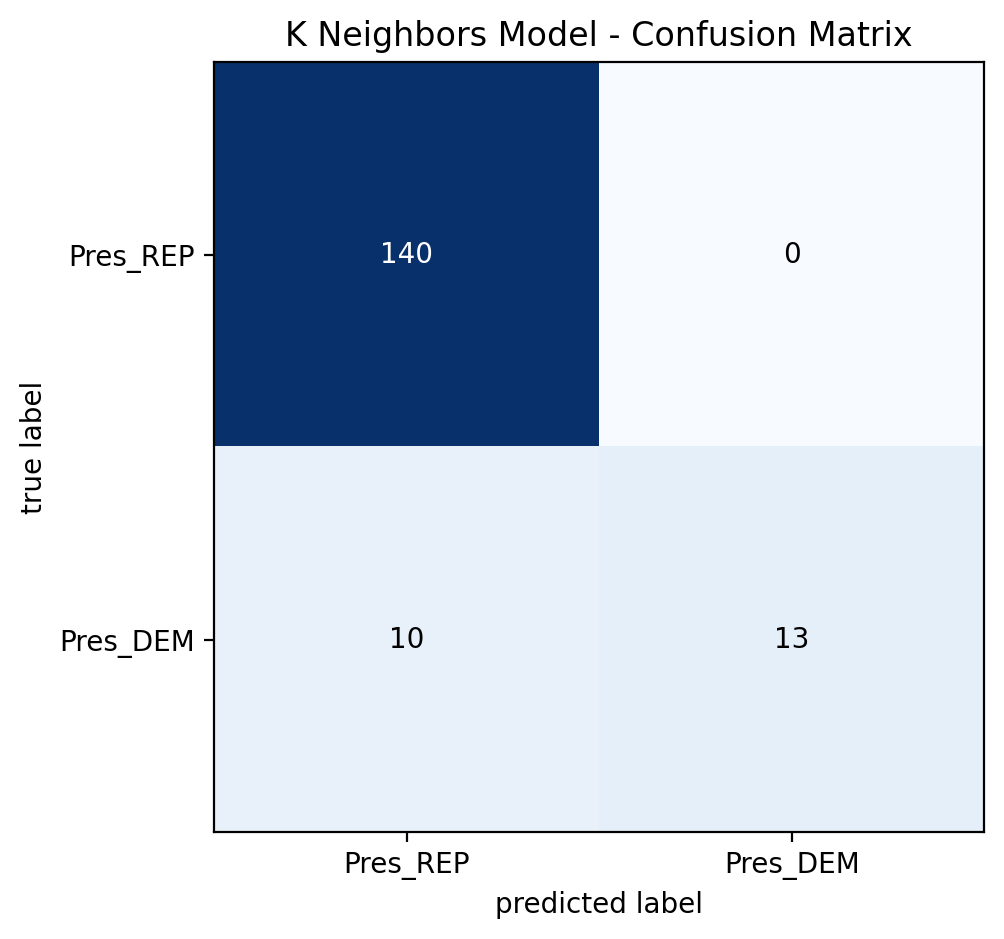

In [659]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### K Means Clustering

In [660]:
from sklearn.cluster import KMeans

kms = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
               n_clusters=2, n_init=10, random_state=13725, tol=0.0001, verbose=0)
km_pred = kms.fit_predict(x_train)
#print(kms.cluster_centers_)
kms_acc = accuracy_score(y_train, km_pred)
print(Fore.GREEN + f"Accuracy of K-Means Clusters is : {100*kms_acc:.2f}%")

Accuracy of K-Means Clusters is : 26.91%


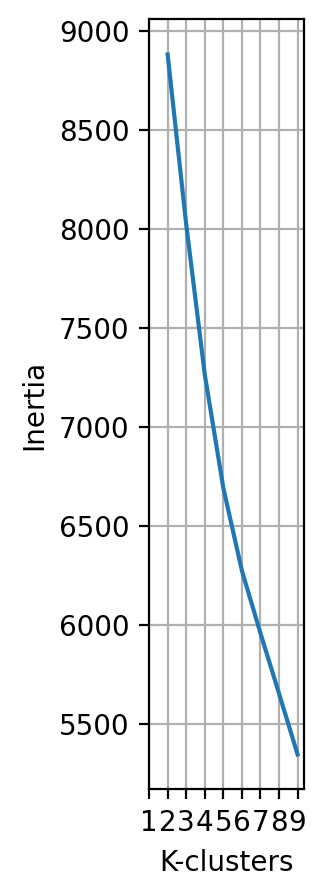

In [661]:
# K-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 계산
# 이 거리의 제곱합: Inertia (클러스터에 속한 샘플이 얼마나 가갑게 모여있는지)
inertia = []
plt.figure(figsize=(1,5))
for k in range(2,10):
    kms =  KMeans(n_clusters=k)
    kms.fit(x_train)
    inertia.append(kms.inertia_)
plt.plot(range(2,10), inertia)
plt.xlabel('K-clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,10))
plt.grid()
plt.show()

### Decision Tree Classifier

In [684]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=13725, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_dict['Decision Tree Classifier'] = 100*dt_acc
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       140
           1       0.83      0.65      0.73        23

    accuracy                           0.93       163
   macro avg       0.89      0.82      0.85       163
weighted avg       0.93      0.93      0.93       163



In [663]:
print(Fore.GREEN + f"Accuracy of Decision Tree Classifier is : {100*dt_acc:.2f}%")

Accuracy of Decision Tree Classifier is : 93.25%


<Figure size 640x480 with 0 Axes>

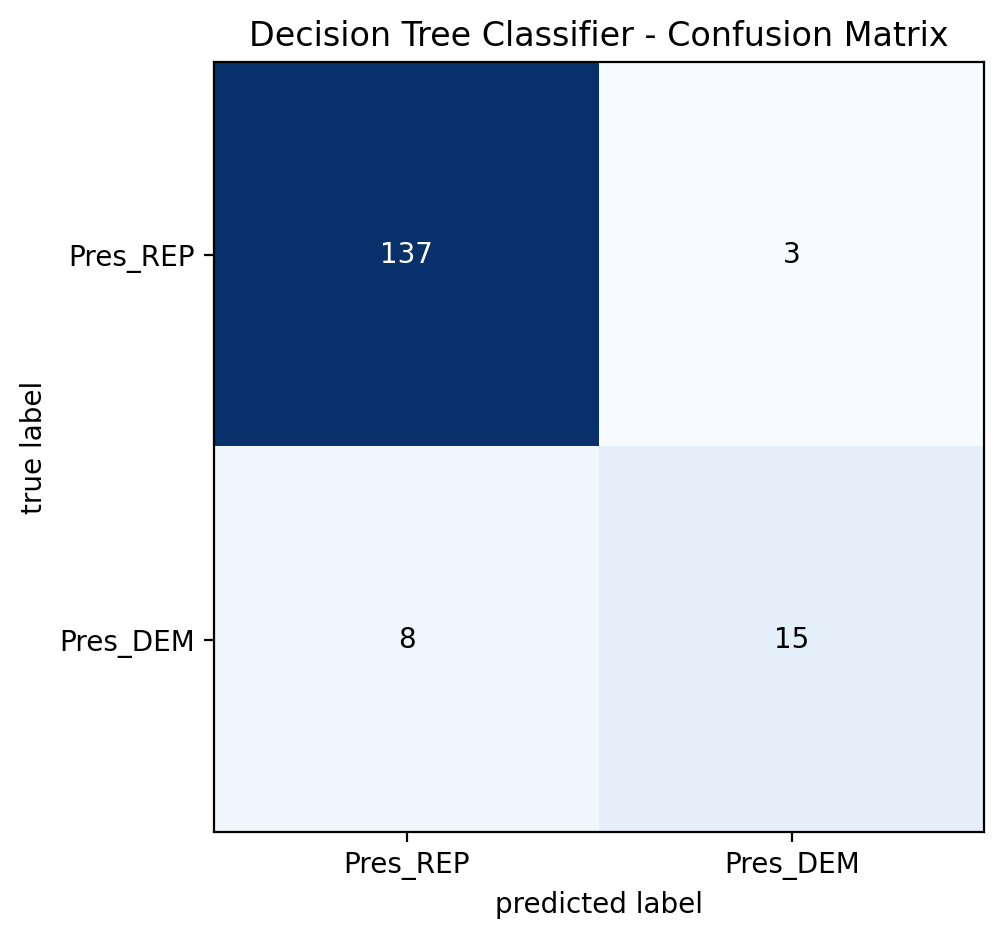

In [664]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Classifier - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### Random Forest Classifier

In [665]:
from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_dict['Random Forest Classifier'] = 100*r_acc
print(classification_report(y_test, r_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       140
           1       0.79      0.65      0.71        23

    accuracy                           0.93       163
   macro avg       0.87      0.81      0.84       163
weighted avg       0.92      0.93      0.92       163



In [666]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  92.64%


<Figure size 640x480 with 0 Axes>

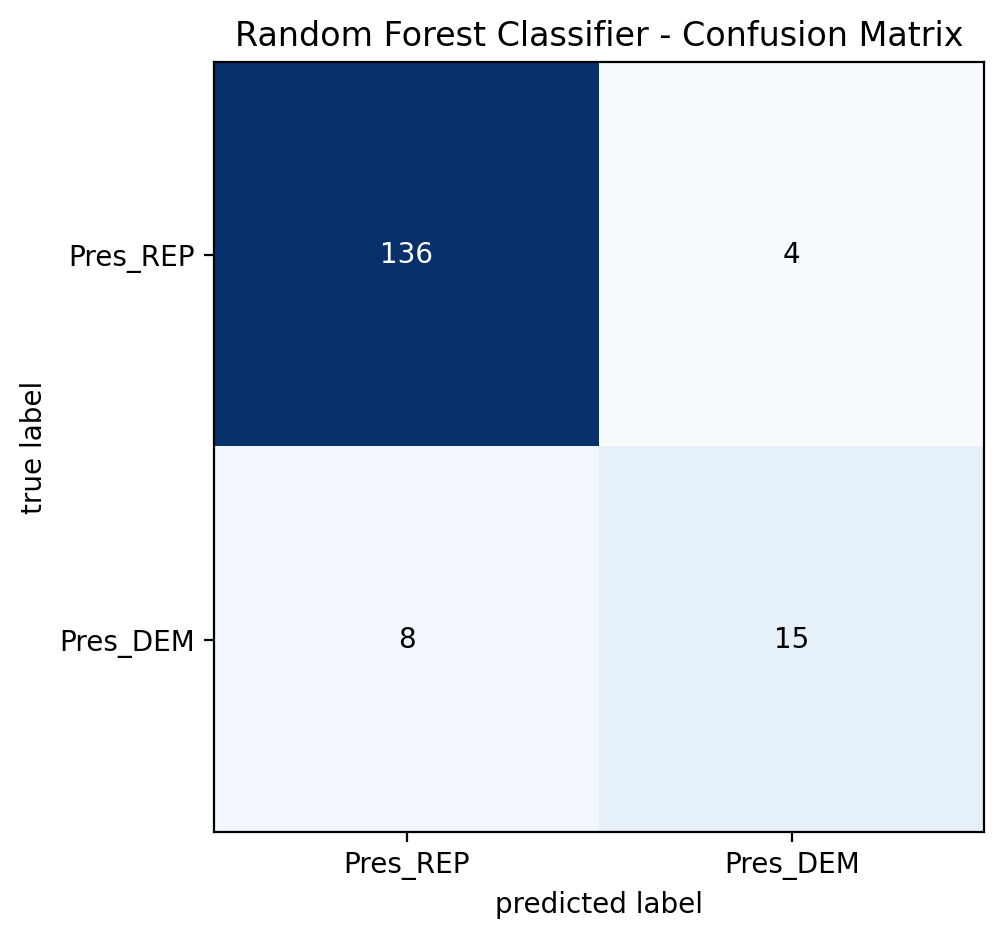

In [667]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Classifier - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### Gradient Boosting Classifier

In [668]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train, y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_dict['Gradient Boosting Classifier'] = 100*gradientboost_acc
print(classification_report(y_test, gradientboost_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       140
           1       0.88      0.65      0.75        23

    accuracy                           0.94       163
   macro avg       0.91      0.82      0.86       163
weighted avg       0.94      0.94      0.93       163



In [669]:
print(Fore.GREEN + f"Accuracy of Gradient Boosting is : {100*gradientboost_acc:.2f}%")

Accuracy of Gradient Boosting is : 93.87%


<Figure size 640x480 with 0 Axes>

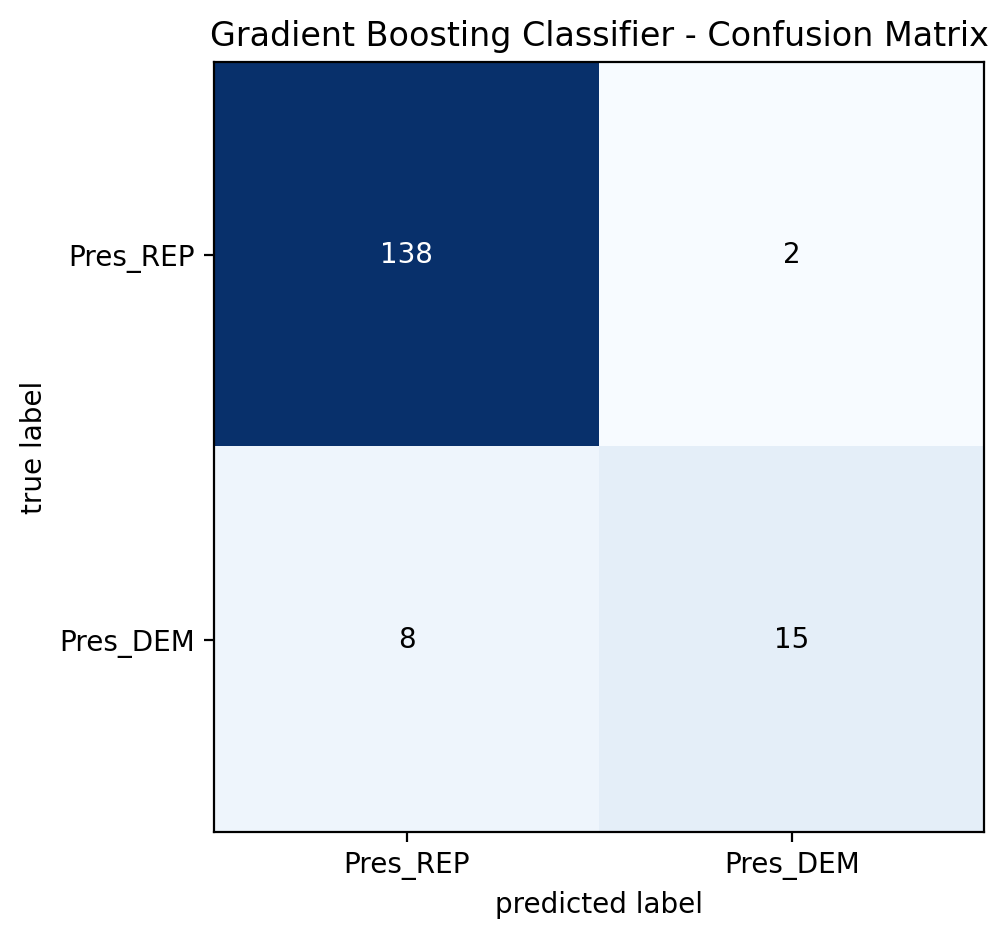

In [670]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### XGBoost Classifier

In [671]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(eval_metric='mlogloss',
                            use_label_encoder =False,
                            max_depth=3,
                            random_state=1)
xgb_clf.fit(x_train, y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_dict['XGBoost Classifier'] = 100*xgb_acc
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       140
           1       0.94      0.65      0.77        23

    accuracy                           0.94       163
   macro avg       0.94      0.82      0.87       163
weighted avg       0.94      0.94      0.94       163



In [672]:
print(Fore.GREEN + f"Accuracy of XGBClassifier is : {100*xgb_acc:.2f}%")

Accuracy of XGBClassifier is : 94.48%


<Figure size 640x480 with 0 Axes>

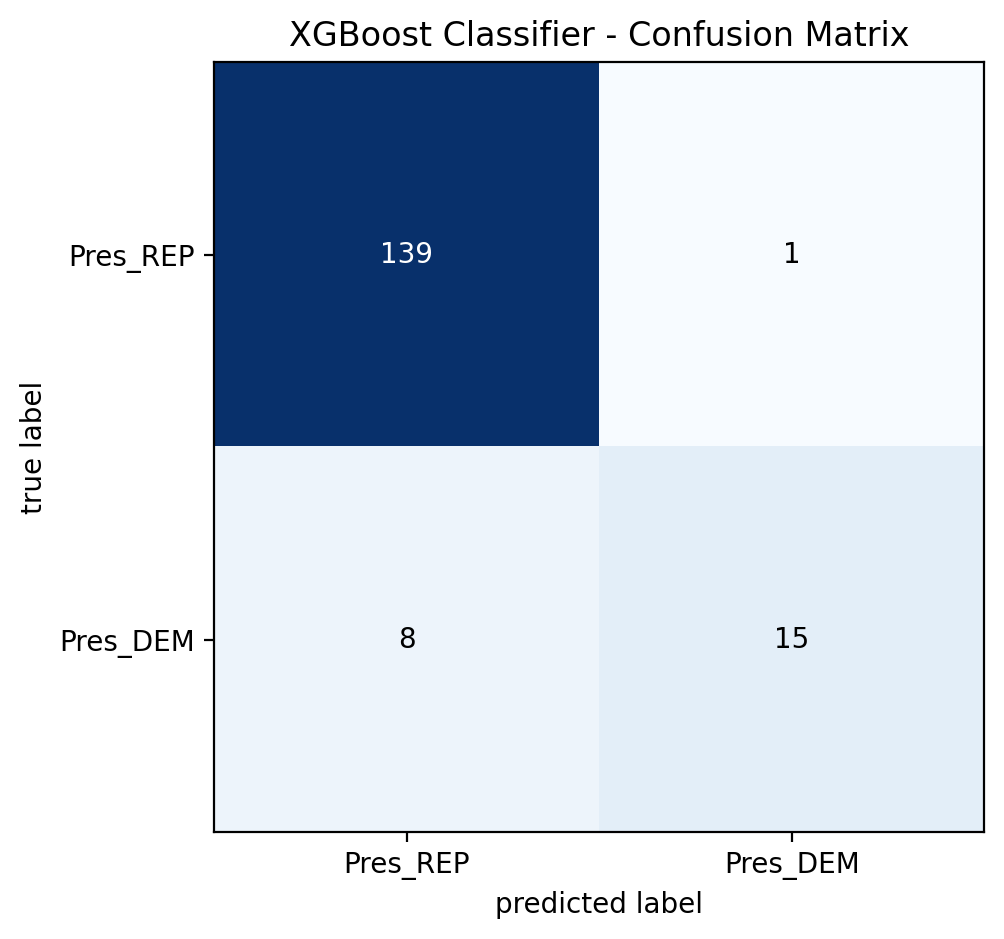

In [673]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("XGBoost Classifier - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### XGBoost Random Forest Classifier

In [674]:
from xgboost import XGBRFClassifier

xgbrf_clf = XGBRFClassifier(eval_metric='mlogloss',
                            use_label_encoder =False,
                            max_depth=3,
                            random_state=1)
xgbrf_clf.fit(x_train, y_train)
xgbrf_pred = xgbrf_clf.predict(x_test)
xgbrf_acc = accuracy_score(y_test, xgbrf_pred)
accuracy_dict['XGBF Classifier'] = 100*xgbrf_acc
print(classification_report(y_test, xgbrf_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       140
           1       0.80      0.52      0.63        23

    accuracy                           0.91       163
   macro avg       0.86      0.75      0.79       163
weighted avg       0.91      0.91      0.91       163



In [675]:
print(Fore.GREEN + f"Accuracy of XGBRFClassifier is : {100*xgbrf_acc:.2f}%")

Accuracy of XGBRFClassifier is : 91.41%


<Figure size 640x480 with 0 Axes>

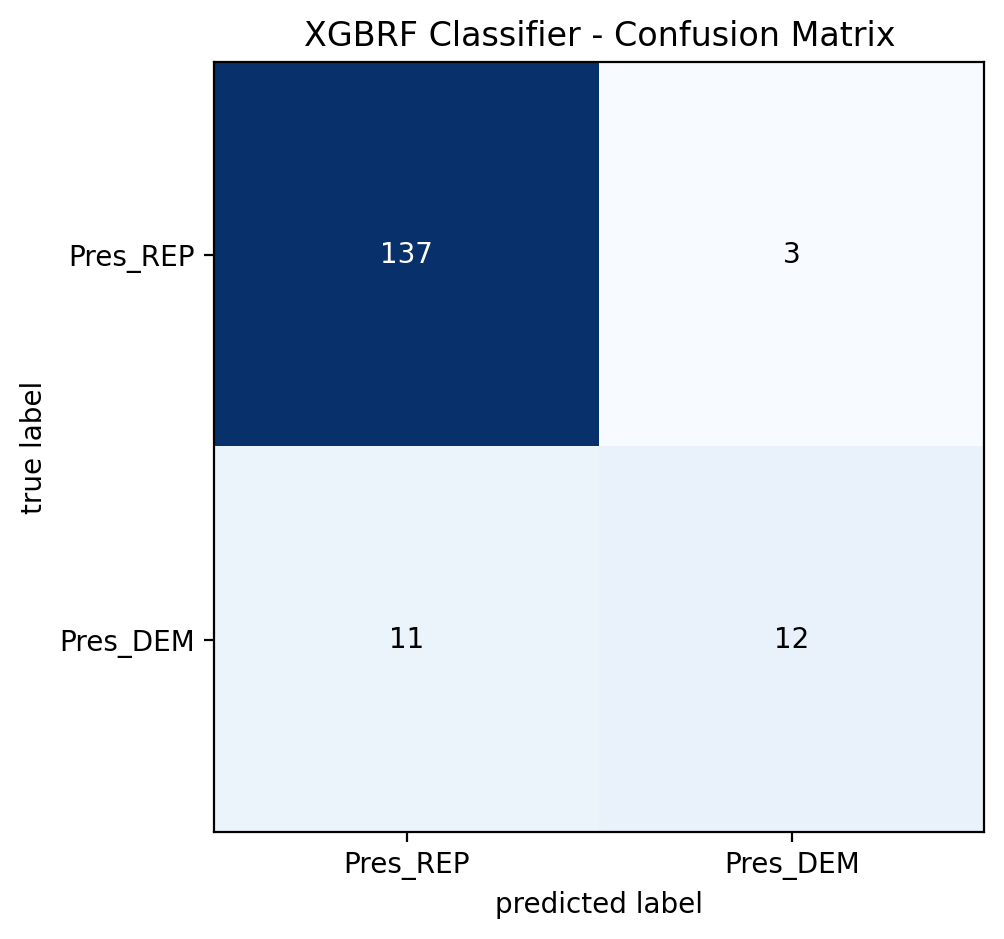

In [676]:
cm = confusion_matrix(y_test, xgbrf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("XGBRF Classifier - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### Light GBM Classifier

In [677]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(max_depth=2,random_state=4)
lgb_clf.fit(x_train, y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_dict['LightGBM Classifier'] = 100*lgb_acc
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       140
           1       0.89      0.74      0.81        23

    accuracy                           0.95       163
   macro avg       0.93      0.86      0.89       163
weighted avg       0.95      0.95      0.95       163



In [678]:
print(Fore.GREEN + f'Accuracy of LGBM Classifier is : {100*lgb_acc:.2f}%')

Accuracy of LGBM Classifier is : 95.09%


<Figure size 640x480 with 0 Axes>

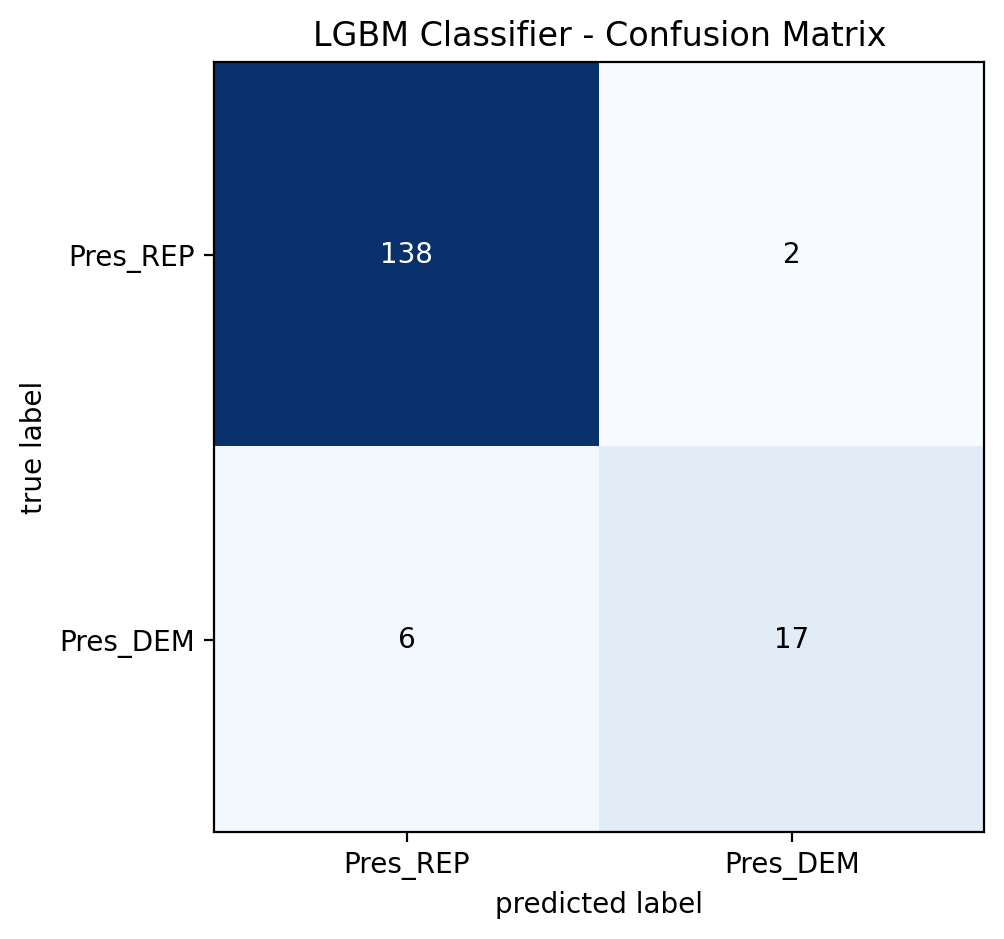

In [679]:
cm = confusion_matrix(y_test, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBM Classifier - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

### Cat Boost Classifier

In [680]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_dict['Cat Boost Classifier'] = 100*cat_acc
print(classification_report(y_test, cat_pred))

Learning rate set to 0.006808
0:	learn: 0.6843074	total: 2.08ms	remaining: 2.08s
1:	learn: 0.6769547	total: 3.02ms	remaining: 1.5s
2:	learn: 0.6674523	total: 3.98ms	remaining: 1.32s
3:	learn: 0.6591093	total: 4.86ms	remaining: 1.21s
4:	learn: 0.6511855	total: 5.92ms	remaining: 1.18s
5:	learn: 0.6434120	total: 6.85ms	remaining: 1.13s
6:	learn: 0.6350018	total: 7.77ms	remaining: 1.1s
7:	learn: 0.6261991	total: 8.94ms	remaining: 1.11s
8:	learn: 0.6187716	total: 9.94ms	remaining: 1.09s
9:	learn: 0.6102089	total: 10.9ms	remaining: 1.08s
10:	learn: 0.6020527	total: 11.8ms	remaining: 1.06s
11:	learn: 0.5926710	total: 12.9ms	remaining: 1.06s
12:	learn: 0.5826793	total: 14ms	remaining: 1.06s
13:	learn: 0.5737158	total: 15ms	remaining: 1.06s
14:	learn: 0.5667700	total: 16.4ms	remaining: 1.08s
15:	learn: 0.5566242	total: 18.2ms	remaining: 1.12s
16:	learn: 0.5495373	total: 19.4ms	remaining: 1.12s
17:	learn: 0.5429567	total: 20.3ms	remaining: 1.11s
18:	learn: 0.5360841	total: 21.4ms	remaining: 1.1s

164:	learn: 0.1413230	total: 195ms	remaining: 988ms
165:	learn: 0.1402778	total: 197ms	remaining: 987ms
166:	learn: 0.1396094	total: 197ms	remaining: 985ms
167:	learn: 0.1387304	total: 198ms	remaining: 983ms
168:	learn: 0.1375136	total: 199ms	remaining: 980ms
169:	learn: 0.1365286	total: 200ms	remaining: 978ms
170:	learn: 0.1355192	total: 201ms	remaining: 975ms
171:	learn: 0.1348188	total: 202ms	remaining: 974ms
172:	learn: 0.1339302	total: 203ms	remaining: 972ms
173:	learn: 0.1329952	total: 205ms	remaining: 971ms
174:	learn: 0.1321268	total: 206ms	remaining: 970ms
175:	learn: 0.1315658	total: 207ms	remaining: 968ms
176:	learn: 0.1305855	total: 208ms	remaining: 967ms
177:	learn: 0.1298877	total: 209ms	remaining: 966ms
178:	learn: 0.1292755	total: 211ms	remaining: 967ms
179:	learn: 0.1280708	total: 212ms	remaining: 966ms
180:	learn: 0.1275268	total: 213ms	remaining: 964ms
181:	learn: 0.1268886	total: 214ms	remaining: 962ms
182:	learn: 0.1260708	total: 215ms	remaining: 960ms
183:	learn: 

336:	learn: 0.0657875	total: 391ms	remaining: 769ms
337:	learn: 0.0654655	total: 392ms	remaining: 768ms
338:	learn: 0.0652414	total: 394ms	remaining: 768ms
339:	learn: 0.0650394	total: 395ms	remaining: 766ms
340:	learn: 0.0648220	total: 396ms	remaining: 765ms
341:	learn: 0.0646234	total: 397ms	remaining: 763ms
342:	learn: 0.0644628	total: 398ms	remaining: 762ms
343:	learn: 0.0640806	total: 399ms	remaining: 760ms
344:	learn: 0.0639230	total: 400ms	remaining: 759ms
345:	learn: 0.0636198	total: 401ms	remaining: 757ms
346:	learn: 0.0633057	total: 402ms	remaining: 756ms
347:	learn: 0.0630212	total: 403ms	remaining: 755ms
348:	learn: 0.0627656	total: 404ms	remaining: 753ms
349:	learn: 0.0624894	total: 405ms	remaining: 752ms
350:	learn: 0.0622841	total: 406ms	remaining: 750ms
351:	learn: 0.0620938	total: 407ms	remaining: 749ms
352:	learn: 0.0618373	total: 409ms	remaining: 749ms
353:	learn: 0.0617175	total: 410ms	remaining: 748ms
354:	learn: 0.0614889	total: 411ms	remaining: 746ms
355:	learn: 

539:	learn: 0.0358560	total: 588ms	remaining: 501ms
540:	learn: 0.0357390	total: 589ms	remaining: 500ms
541:	learn: 0.0356237	total: 590ms	remaining: 499ms
542:	learn: 0.0355644	total: 591ms	remaining: 498ms
543:	learn: 0.0354515	total: 593ms	remaining: 497ms
544:	learn: 0.0353300	total: 594ms	remaining: 496ms
545:	learn: 0.0352131	total: 595ms	remaining: 495ms
546:	learn: 0.0351524	total: 596ms	remaining: 493ms
547:	learn: 0.0350613	total: 597ms	remaining: 492ms
548:	learn: 0.0349948	total: 598ms	remaining: 491ms
549:	learn: 0.0348476	total: 599ms	remaining: 490ms
550:	learn: 0.0348053	total: 600ms	remaining: 489ms
551:	learn: 0.0347243	total: 601ms	remaining: 488ms
552:	learn: 0.0346203	total: 602ms	remaining: 487ms
553:	learn: 0.0345343	total: 603ms	remaining: 486ms
554:	learn: 0.0344671	total: 604ms	remaining: 485ms
555:	learn: 0.0344247	total: 605ms	remaining: 483ms
556:	learn: 0.0343535	total: 606ms	remaining: 482ms
557:	learn: 0.0342586	total: 607ms	remaining: 481ms
558:	learn: 

709:	learn: 0.0242867	total: 785ms	remaining: 321ms
710:	learn: 0.0242492	total: 786ms	remaining: 320ms
711:	learn: 0.0242121	total: 787ms	remaining: 318ms
712:	learn: 0.0241617	total: 788ms	remaining: 317ms
713:	learn: 0.0241189	total: 789ms	remaining: 316ms
714:	learn: 0.0240977	total: 790ms	remaining: 315ms
715:	learn: 0.0240666	total: 791ms	remaining: 314ms
716:	learn: 0.0240207	total: 793ms	remaining: 313ms
717:	learn: 0.0239726	total: 794ms	remaining: 312ms
718:	learn: 0.0239238	total: 795ms	remaining: 311ms
719:	learn: 0.0238808	total: 797ms	remaining: 310ms
720:	learn: 0.0238229	total: 798ms	remaining: 309ms
721:	learn: 0.0237671	total: 799ms	remaining: 308ms
722:	learn: 0.0237308	total: 800ms	remaining: 307ms
723:	learn: 0.0236922	total: 801ms	remaining: 305ms
724:	learn: 0.0236256	total: 802ms	remaining: 304ms
725:	learn: 0.0235903	total: 803ms	remaining: 303ms
726:	learn: 0.0235588	total: 804ms	remaining: 302ms
727:	learn: 0.0235130	total: 805ms	remaining: 301ms
728:	learn: 

902:	learn: 0.0169897	total: 982ms	remaining: 106ms
903:	learn: 0.0169704	total: 984ms	remaining: 104ms
904:	learn: 0.0169311	total: 985ms	remaining: 103ms
905:	learn: 0.0169105	total: 986ms	remaining: 102ms
906:	learn: 0.0168817	total: 987ms	remaining: 101ms
907:	learn: 0.0168621	total: 988ms	remaining: 100ms
908:	learn: 0.0168225	total: 989ms	remaining: 99ms
909:	learn: 0.0167906	total: 990ms	remaining: 97.9ms
910:	learn: 0.0167682	total: 991ms	remaining: 96.8ms
911:	learn: 0.0167235	total: 992ms	remaining: 95.7ms
912:	learn: 0.0166976	total: 993ms	remaining: 94.6ms
913:	learn: 0.0166454	total: 994ms	remaining: 93.5ms
914:	learn: 0.0166127	total: 995ms	remaining: 92.4ms
915:	learn: 0.0165664	total: 996ms	remaining: 91.3ms
916:	learn: 0.0165444	total: 997ms	remaining: 90.2ms
917:	learn: 0.0165103	total: 998ms	remaining: 89.1ms
918:	learn: 0.0164809	total: 999ms	remaining: 88ms
919:	learn: 0.0164551	total: 1000ms	remaining: 86.9ms
920:	learn: 0.0164185	total: 1s	remaining: 85.8ms
921:	

In [681]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  94.48%


<Figure size 640x480 with 0 Axes>

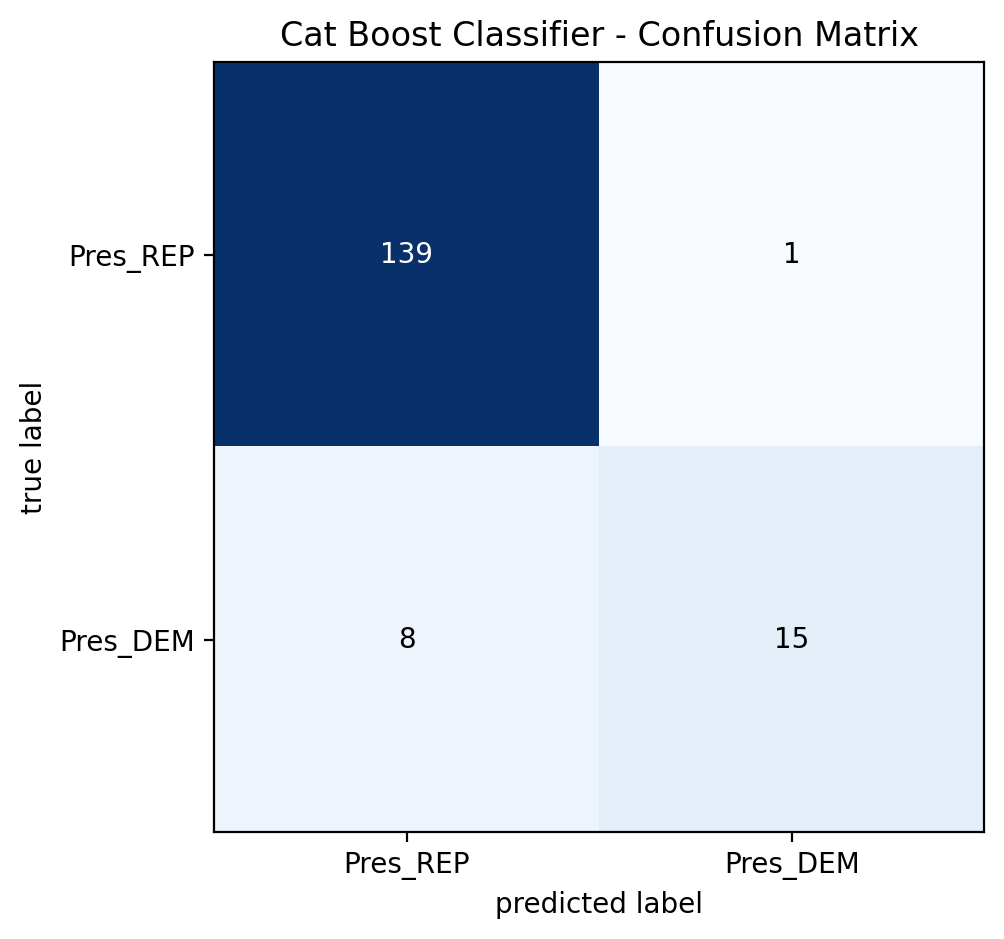

In [682]:
cm = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (5,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Cat Boost Classifier - Confusion Matrix")
plt.xticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.yticks(range(2), ["Pres_REP", "Pres_DEM"], fontsize=10)
plt.show()

In [690]:
accuracy_dict.values()

dict_values([94.47852760736197, 93.25153374233128, 93.86503067484662, 93.25153374233128, 92.63803680981594, 93.86503067484662, 94.47852760736197, 91.41104294478528, 95.0920245398773, 94.47852760736197])

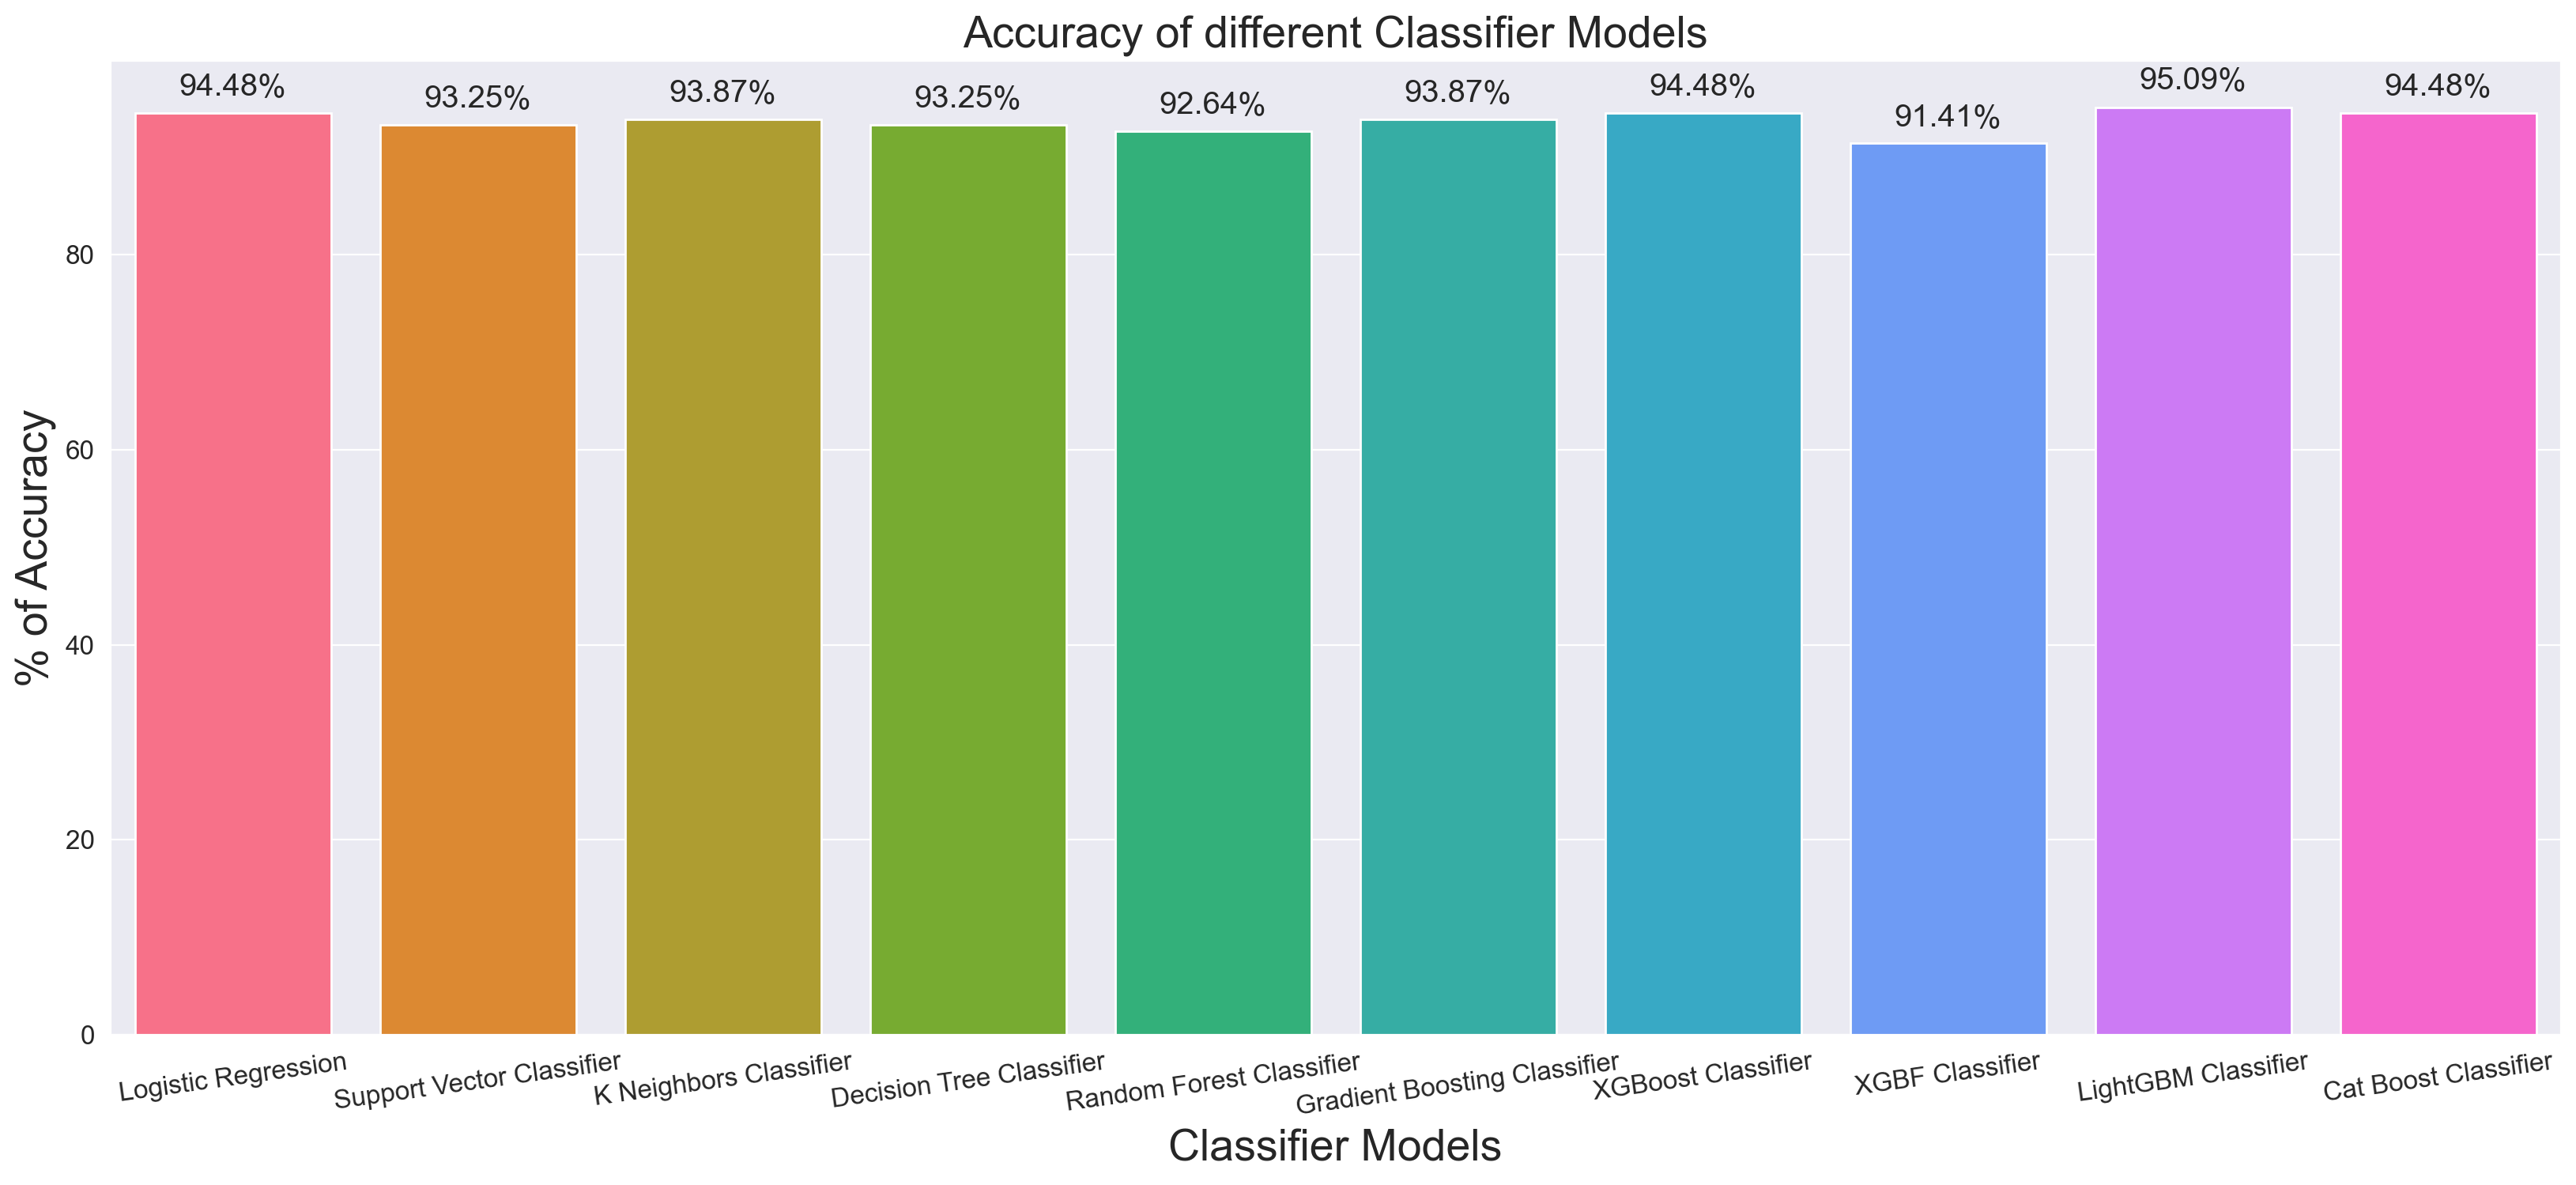

In [692]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()), palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()